<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


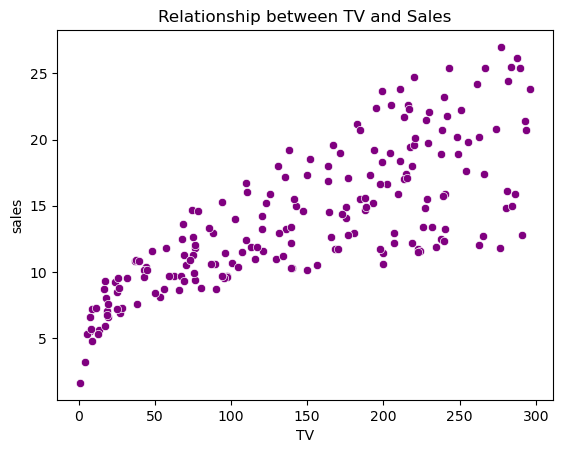

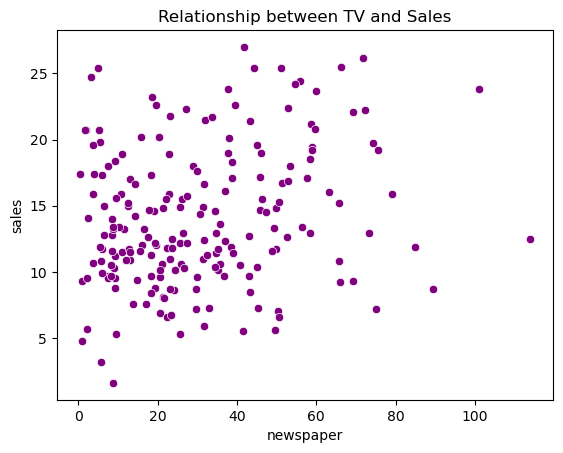

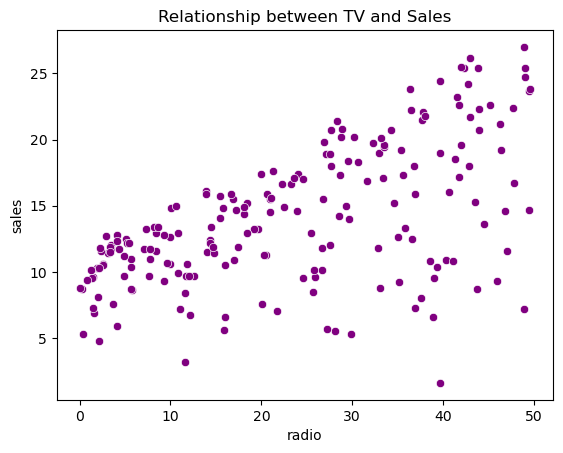

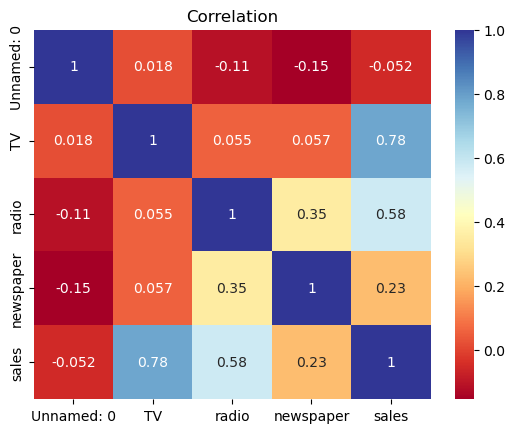

[[-1.72341210e+00  9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.70609137e+00 -1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.68877065e+00 -1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [-1.67144992e+00  5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [-1.65412920e+00  3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.63680847e+00 -1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.61948775e+00 -1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-1.60216702e+00 -3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.58484630e+00 -1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [-1.56752558e+00  6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-1.55020485e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [-1.53288413e+00  7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.51556340e+00 -1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-1.49824268e+00 -5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [-1.48092195e+00  6.66253447e-01  6.50657027e-01  7.11007392e

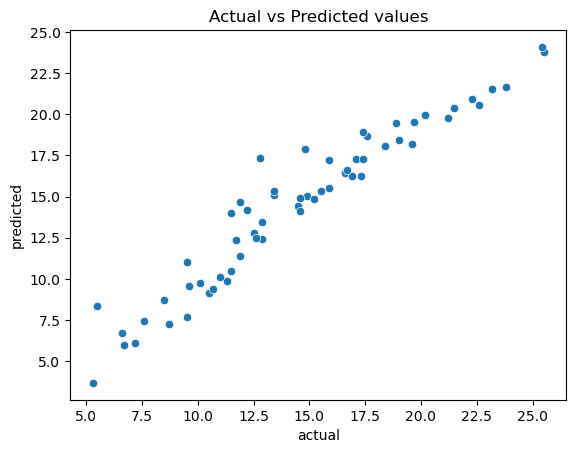

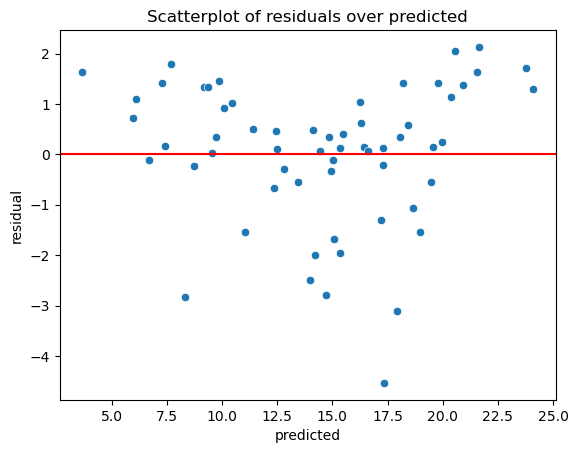

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


LR=pd.read_csv('Advertising.csv')
LR.head()
LR.info()
LR.shape
LR.describe()


sns.scatterplot(data=LR, x='TV', y='sales', color='purple')
plt.title('Relationship between TV and Sales')
plt.show()


sns.scatterplot(data=LR, x='newspaper', y='sales', color='purple')
plt.title('Relationship between TV and Sales')
plt.show()


sns.scatterplot(data=LR, x='radio', y='sales', color='purple')
plt.title('Relationship between TV and Sales')
plt.show()


LR.corr()


sns.heatmap(LR.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = LR.drop('sales', axis=1)
y = LR['sales']
X.head()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)


LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)


print('Coefficient of determination: ', LRmodel.score(X_train, y_train))


y_pred = LRmodel.predict(X_train)


print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))


print('Coefficient of determination: ', LRmodel.score(X_test, y_test))


y_pred_test = LRmodel.predict(X_test)


print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE: ',mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))


results = pd.DataFrame({'actual': y_test,'predicted': y_pred_test.ravel(),'residual': y_test - y_pred_test})
results.head()


sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()


# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()


coefficients = pd.DataFrame(LRmodel.coef_, index=X.columns).T
coefficients


# Assuming 'regression_model' is the trained linear regression model for "Advertising.csv"
# Perform t-test for parameter significance
import statsmodels.api as sm

# Add a constant term to the features for the linear regression model
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_constant).fit()

model



